## FFT

Based on material in the <a href="http://www.scipy-lectures.org/">SciPy Lecture Notes</a>. 

Marty Ligare, August 2020

In [2]:
import numpy as np
from scipy import fftpack
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Following is an Ipython magic command that puts figures in the  notebook.
%matplotlib notebook

# Following sets up LateX fonts
#mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#mpl.rc('text', usetex=True)

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic')
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

### Generate signal

Signal is two superposed sine waves with noise.

In [4]:
a1, a2 = 2, 1  # Amplitudes
f1, f2 = 5, 10 # Frequencies
tf = 2         # Final time
dt = 0.01      # Time step

In [5]:
t = np.arange(0,tf,dt)  # Signal samle times

In [6]:
sig = a1*np.sin(2.*np.pi*f1*t) + a2*np.sin(2.*np.pi*f2*t)
sig += 3*stats.uniform.rvs(size=len(t))

<IPython.core.display.Javascript object>


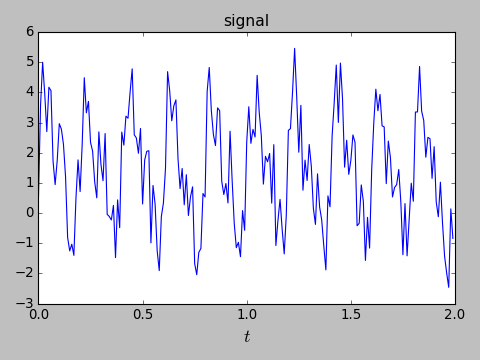

In [7]:
plt.figure(1)
plt.title("signal",fontsize=14)
plt.xlabel("$t$")
plt.plot(t,sig);

### Calculate FFT

In [8]:
sample_freq = fftpack.fftfreq(len(sig),d=dt) # Frequency values (+,-)
sig_fft = fftpack.fft(sig)                   # Calculate FFT

- Display real and imaginary parts of FFT.
- 0 is in center
- Symmetric about 0

<IPython.core.display.Javascript object>


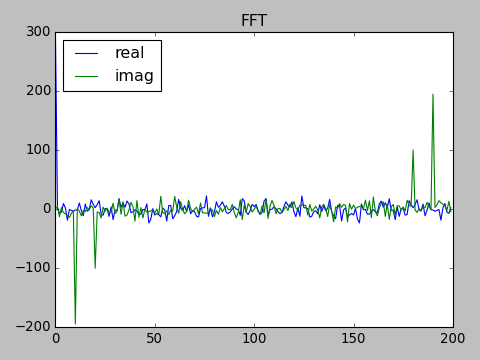

In [9]:
plt.figure(2)
plt.title("FFT",fontsize=14)
plt.plot(sig_fft.real, label='real')
plt.plot(sig_fft.imag,label='imag')
plt.legend(loc=2);

Calculate and plot power spectrum for $f>0$.

In [10]:
pfs = np.where(sample_freq>0) # Select postive frequencies
freqs = sample_freq[pfs]
power = abs(sig_fft)[pfs]**2      

<IPython.core.display.Javascript object>


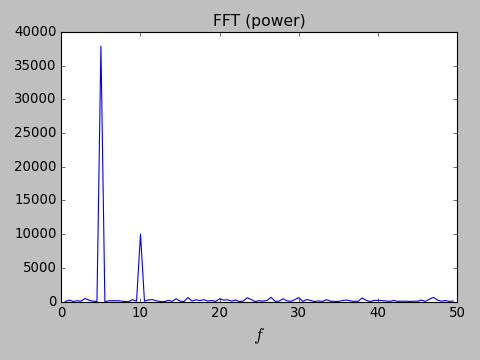

In [11]:
plt.figure(3)
plt.title("FFT (power)",fontsize=14)
plt.xlabel("$f$")
plt.plot(freqs,power);

### Filter and inverse transform

Crude low-pass filter: cut out all frequencies greater than 12.

In [12]:
sig_fft[abs(sample_freq)> 12] = 0

Calculate inverse FFT:

In [13]:
sig_filtered = fftpack.ifft(sig_fft)

<IPython.core.display.Javascript object>


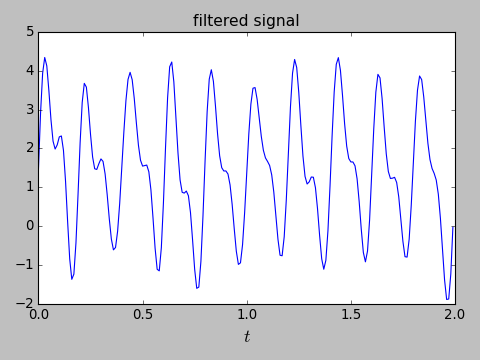

In [14]:
plt.figure(4)
plt.title("filtered signal",fontsize=14)
plt.xlabel("$t$")
plt.plot(t,np.real(sig_filtered));

#### Version information
`version_information` is from J.R. Johansson (jrjohansson at gmail.com); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

`version_information` is installed on the linux network at Bucknell

In [15]:
%load_ext version_information

In [16]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 3.10.0 1062.9.1.el7.x86_64 x86_64 with centos 7.7.1908 Core
numpy 1.18.5
scipy 1.5.2
matplotlib 3.3.0
Fri Aug 07 15:29:42 2020 EDT